In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'cmr10'
plt.rcParams['font.size'] = 10
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.formatter.use_mathtext'] = True

# plt.figure(figsize=(4.9, 3.5))

In [2]:
# Function for loading data
def load(file: str):
    data = pd.read_csv(file)
    data["command"] = data["command"].str.slice(1, -2)
    data["command"] = pd.to_numeric(data["command"])
    times = data["mean"]
    # check first letter of file
    if file[0] == "h":
        O0 = "Haskell"
        O3 = "Haskell -O3"
    elif file[0] == "c":
        O0 = "C"
        O3 = "C -O3"
    else:
        O0 = "Project"
        O3 = "Project -O3"
    
    if len(times) == 2:
        data[O0] = times[0]
        data[O3] = times[1]
    else:
        data[O0] = np.nan
        data[O3] = times[0]
    return data.iloc[0:1][["command", O0, O3]]

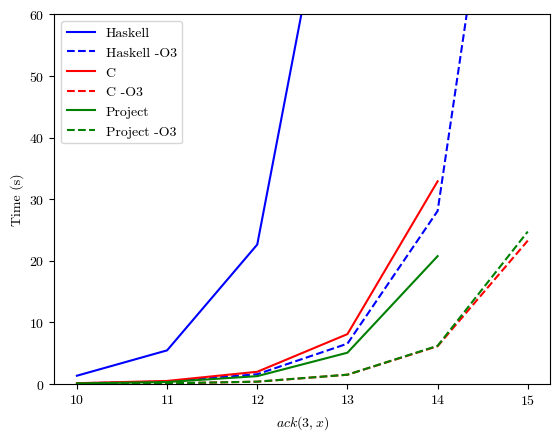

In [4]:
c_times = pd.concat([
    load("c10.csv"),
    load("c11.csv"),
    load("c12.csv"),
    load("c13.csv"),
    load("c14.csv"),
    load("c15.csv"),
], ignore_index=True)
c_times.set_index("command", inplace=True)

haskell_times = pd.concat([
    load("h10.csv"),
    load("h11.csv"),
    load("h12.csv"),
    load("h13.csv"),
    load("h14.csv"),
    load("h15.csv"),
], ignore_index=True)
haskell_times.set_index("command", inplace=True)

my_times = pd.concat([
    load("p10.csv"),
    load("p11.csv"),
    load("p12.csv"),
    load("p13.csv"),
    load("p14.csv"),
    load("p15.csv"),
], ignore_index=True)
my_times.set_index("command", inplace=True)

ax = haskell_times.plot(style=['b', 'b--'])
ax = c_times.plot(ax=ax, style=['r', 'r--'])
my_times.plot(ax=ax, style=['g', 'g--'],)

plt.ylim(0, 60)
plt.xlabel("$ack(3,x)$")
plt.ylabel("Time (s)")
plt.savefig("ackermann-benchmark.pdf", bbox_inches='tight')